<div style="text-align: center;">
<font size="45"><b>Portfolio Evgeny Bagiev</b></font>
    <h1>CLEANING & ANALYZING THE DATABASE OF THE STORE I WORK IN, CONTAINING EACH RECORDED SALE DURING THE MONTH OF JUNE</h1>
    </div>

<h3>Tasks:</h3>
<ul>
   <li>Load the database of each individual sale made during the month of June</li>
   <li>Clean the dataframe (getting rid of NaN, duplicate values, and unnecessary columns)</li>
   <li>Analyze the cleaned dataframe</li>
   <li>Create data visualisation of the results of my analysis</li> 
</ul>

# <h1><b>Step 1: Loading the Dataset</b></h1>

<h3>Importing the essencial libraries & the dataset</h3>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv(r"data berezka\prodazi 1.06-30.06.csv")

# <h1><b>Step 2: Cleaning</b></h1>

In [33]:
#first I want to check the first 25 values of the df

df.head(25)

,Document Number,Date,Product Name,Partner,Group,Object,Shop,User,Amount,Unit of Measurment.,Sale Price per Item,VAT per Item,Total Sale Price,Total VAT for Sale,Operation
0,8045220,01.06.2024,GLAZED COOKIES CHOCO PIE 120g,??????????/???????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,1.40,0.066667,1.40,0.066667,???????
1,8045220,01.06.2024,MILK CHOCOLATE LUBIMAYA ALYONKA 100 g,??????????/???????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,1.99,0.094762,1.99,0.094762,???????
2,8045220,01.06.2024,MILK CHOCOLATE LUBIMAYA ALYONKA 100 g,??????????/???????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,1.99,0.094762,1.99,0.094762,???????
3,8045221,01.06.2024,CREPES WITH COTTAGE CHEESE AND RAISINS,?????????/????? ? ???????,Client,Default group,Paphos Shop,Paphos 1,4.0,pcs.,1.44,0.068571,5.76,0.274286,???????
4,8045221,01.06.2024,MERINGUE ROLL 250gr,?????????/?????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,3.99,0.190000,3.99,0.190000,???????
5,8045221,01.06.2024,COTTAGE CHEESE GRANULATED 7 FAT 200 g,???????/??????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,1.99,0.094762,1.99,0.094762,???????
6,8045221,01.06.2024,COTTAGE CHEESE GRANULATED WITH STRAWBERRY JAM ...,???????/??????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,1.99,0.094762,1.99,0.094762,???????
7,8045221,01.06.2024,COTTAGE CHEESE GRANULATED WITH BLACKBERRY JAM ...,???????/??????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,1.99,0.094762,1.99,0.094762,???????
8,8045221,01.06.2024,COTTAGE CHEESE GRANULATED WITH BLACKBERRY JAM ...,???????/??????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,1.99,0.094762,1.99,0.094762,???????
9,8045221,01.06.2024,YOGURT STRAWBERRY 2 120g SAVUSHKIN,???????/??????? ? ????????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,0.99,0.047143,0.99,0.047143,???????


<h3>The first aspect of the DF I would like to change is the column name. I would like to remove spaces and fix the "Unit of Meaurement" column by removing the "." at the end</h3>

In [34]:
df.rename(columns={'Unit of Measurment.':'Unit_of_Measurement'}, inplace=True)
new_col_names=df.columns.str.replace(' ', '_').str.lower()
df.columns = new_col_names

In [35]:
df

,document_number,date,product_name,partner,group,object,shop,user,amount,unit_of_measurement,sale_price_per_item,vat_per_item,total_sale_price,total_vat_for_sale,operation
0,8045220,01.06.2024,GLAZED COOKIES CHOCO PIE 120g,??????????/???????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,1.40,0.066667,1.40,0.066667,???????
1,8045220,01.06.2024,MILK CHOCOLATE LUBIMAYA ALYONKA 100 g,??????????/???????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,1.99,0.094762,1.99,0.094762,???????
2,8045220,01.06.2024,MILK CHOCOLATE LUBIMAYA ALYONKA 100 g,??????????/???????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,1.99,0.094762,1.99,0.094762,???????
3,8045221,01.06.2024,CREPES WITH COTTAGE CHEESE AND RAISINS,?????????/????? ? ???????,Client,Default group,Paphos Shop,Paphos 1,4.0,pcs.,1.44,0.068571,5.76,0.274286,???????
4,8045221,01.06.2024,MERINGUE ROLL 250gr,?????????/?????,Client,Default group,Paphos Shop,Paphos 1,1.0,pcs.,3.99,0.190000,3.99,0.190000,???????
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28462,8047314,11.06.2024,KETCHUP SAUCE 50g,?????????/????? ? ?????,WOLT,WOLT,Paphos Shop,Online Paphos,1.0,pcs.,1.25,0.059524,1.25,0.059524,???????
28463,8047324,11.06.2024,OKROSHKA WITH AYRAN,?????????/????,WOLT,WOLT,Paphos Shop,Online Paphos,1.0,pcs.,4.99,0.237619,4.99,0.237619,???????
28464,8047324,11.06.2024,POTATO CAKES WITH MEAT 2 pcs,?????????/??????,WOLT,WOLT,Paphos Shop,Online Paphos,1.0,pcs.,4.80,0.228571,4.80,0.228571,???????
28465,8047324,11.06.2024,KVASS BLACK TARAS 1.5L,???????/????,WOLT,WOLT,Paphos Shop,Online Paphos,1.0,L.,3.80,0.606723,3.80,0.606723,???????


<h3>Checking for NaN values</h3>

In [36]:
df.isna().sum()

document_number        0
date                   0
product_name           0
partner                0
group                  0
object                 0
shop                   0
user                   0
amount                 0
unit_of_measurement    0
sale_price_per_item    0
vat_per_item           0
total_sale_price       0
total_vat_for_sale     0
operation              0
dtype: int64


<h3>I see that there are no NaN values, but based on the first 25 rows, it is visible that instead of NaN values there are '?' instead, therefore I start to look for '?' </h3>


In [37]:
#there are no NaN values, but its visible that instead of NaN values, there are ? (missing data)
#i want to check whether the columns PARTNER and OPERATION have other ? values

print(df['partner'].unique())
print(df['operation'].unique())

['??????????/???????' '?????????/????? ? ???????' '?????????/?????'
 '???????/??????' '???????/??????? ? ????????' '???????/????????? ?????'
 '????????' '???????/?????' '????/????' '???????/????'
 '????????/??????????' '??????????/???????? ????'
 '??????????/??????? ???????' '?????????/??????' '????????/????'
 '?????????/????' '???????/??????? ? ???????' '?????????/???????'
 '??????????' '??????????/?????' '???????/??????????' '???????/???????'
 '???????/??????? ? ?????' '?????????/????????' '?????????/???????? ?????'
 '??????????/????? ? ???????' '????????/??????' '???????/????????'
 '?????/?????' '?????????/???????? ? ????????' '?????????/??????????'
 '????????/??????? ??????' '????????/???????' '?????????/????? ? ?????'
 '????? ? ??????/??????' '????? ? ??????/?????'
 '??????????/????? ? ??????????' '?????/???????' '????????/???? ?????'
 '?????????/????????? ???????????' '?????/???? ? ????'
 '????????/???? ???????' '???????/??? ? ????'
 '????????/???????????? ?????' '????????/?????'

In [38]:
#practically all values in these columns are ?, therefore i will be removing them

df.drop(columns=['operation', 'partner'], inplace=True)

<h3>After removing the columns with missing values, I decide to check the other columns for any missing
    values</h3>

In [39]:
print(df['document_number'].unique())
print(df['group'].unique())
print(df['object'].unique())
print(df['shop'].unique())
print(df['user'].unique())
print(df['unit_of_measurement'].unique())
#checking if other columns contain abnormal values

[8045220 8045221 8045222 ... 8047313 8047314 8047324]
['Client' 'WOLT']
['Default group' 'WOLT']
['Paphos Shop']
['Paphos 1' 'Online Paphos' 'Paphos 2']
['pcs.' '??' 'L.' 'kg.' 'kg' 'item']


<h3>I see that the unit of measurement columns has a ?? value, therefore i want to check the values from other columns that correspond to the ??</h3>

In [40]:
filt=df['unit_of_measurement']=='??'
df[filt]

#creating a filter to check what kind of values in the Unit of Measurment column contain the "??"

,document_number,date,product_name,group,object,shop,user,amount,unit_of_measurement,sale_price_per_item,vat_per_item,total_sale_price,total_vat_for_sale
14,8045221,01.06.2024,PAPER BAG BEREZKA,Client,Default group,Paphos Shop,Paphos 1,1.0,??,0.20,0.031933,0.20,0.031933
30,8045226,01.06.2024,PAPER BAG BEREZKA,Client,Default group,Paphos Shop,Paphos 1,1.0,??,0.20,0.031933,0.20,0.031933
48,8045229,01.06.2024,PAPER BAG BEREZKA,Client,Default group,Paphos Shop,Paphos 1,1.0,??,0.20,0.031933,0.20,0.031933
58,8045233,01.06.2024,PAPER BAG BEREZKA,Client,Default group,Paphos Shop,Paphos 1,1.0,??,0.20,0.031933,0.20,0.031933
87,8045242,01.06.2024,PAPER BAG BEREZKA,Client,Default group,Paphos Shop,Paphos 1,1.0,??,0.20,0.031933,0.20,0.031933
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28257,8051272,30.06.2024,PAPER BAG BEREZKA,Client,Default group,Paphos Shop,Paphos 1,1.0,??,0.20,0.031933,0.20,0.031933
28297,8051276,30.06.2024,PAPER BAG BEREZKA FREE,Client,Default group,Paphos Shop,Paphos 1,1.0,??,0.01,0.001597,0.01,0.001597
28360,8051288,30.06.2024,PAPER BAG BEREZKA,Client,Default group,Paphos Shop,Paphos 1,1.0,??,0.20,0.031933,0.20,0.031933
28374,8051292,30.06.2024,PAPER BAG BEREZKA,Client,Default group,Paphos Shop,Paphos 1,1.0,??,0.20,0.031933,0.20,0.031933


<h3>I see that the product that corresponds to the ?? value is the PAPER BAD BEREZKA, therefore I will change it to pcs</h3>

In [41]:
df['unit_of_measurement'].replace(to_replace=['??'], value =['pcs.'], inplace=True)

#PAPER BAG BEREZKA item has ?? for unit, i will change it to pcs.

C:\Users\evgen\AppData\Local\Temp\ipykernel_29004\1447436435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['unit_of_measurement'].replace(to_replace=['??'], value =['pcs.'], inplace=True)


In [52]:
df.head(25)

#Looking at the first 25 rows to check how the dataframe is looking after the changes

,date,product_name,amount,unit_of_measurement,sale_price_per_item,vat_per_item,total_sale_price,total_vat_for_sale
0,01.06.2024,GLAZED COOKIES CHOCO PIE 120g,1.0,pcs.,1.40,0.066667,1.40,0.066667
1,01.06.2024,MILK CHOCOLATE LUBIMAYA ALYONKA 100 g,1.0,pcs.,1.99,0.094762,1.99,0.094762
2,01.06.2024,MILK CHOCOLATE LUBIMAYA ALYONKA 100 g,1.0,pcs.,1.99,0.094762,1.99,0.094762
3,01.06.2024,CREPES WITH COTTAGE CHEESE AND RAISINS,4.0,pcs.,1.44,0.068571,5.76,0.274286
4,01.06.2024,MERINGUE ROLL 250gr,1.0,pcs.,3.99,0.190000,3.99,0.190000
5,01.06.2024,COTTAGE CHEESE GRANULATED 7 FAT 200 g,1.0,pcs.,1.99,0.094762,1.99,0.094762
6,01.06.2024,COTTAGE CHEESE GRANULATED WITH STRAWBERRY JAM ...,1.0,pcs.,1.99,0.094762,1.99,0.094762
7,01.06.2024,COTTAGE CHEESE GRANULATED WITH BLACKBERRY JAM ...,1.0,pcs.,1.99,0.094762,1.99,0.094762
8,01.06.2024,COTTAGE CHEESE GRANULATED WITH BLACKBERRY JAM ...,1.0,pcs.,1.99,0.094762,1.99,0.094762
9,01.06.2024,YOGURT STRAWBERRY 2 120g SAVUSHKIN,1.0,pcs.,0.99,0.047143,0.99,0.047143


<h3>I notice that the columns OBJECT, DOCUMENT NUMBER, USER, SHOP, GROUP are not needed for my analysis, therefore I will remove them aswell </h3>

In [43]:
#I will remove the column  OBJECT, DOCUMENT NUMBER, USER, SHOP, GROUP since columns OBJECT and GROUP are identical, and the other columns are not needed here

df.drop(columns=['document_number', 'shop', 'object', 'user', 'group'], inplace=True)

In [50]:
df.head(25)

,date,product_name,amount,unit_of_measurement,sale_price_per_item,vat_per_item,total_sale_price,total_vat_for_sale
0,01.06.2024,GLAZED COOKIES CHOCO PIE 120g,1.0,pcs.,1.40,0.066667,1.40,0.066667
1,01.06.2024,MILK CHOCOLATE LUBIMAYA ALYONKA 100 g,1.0,pcs.,1.99,0.094762,1.99,0.094762
2,01.06.2024,MILK CHOCOLATE LUBIMAYA ALYONKA 100 g,1.0,pcs.,1.99,0.094762,1.99,0.094762
3,01.06.2024,CREPES WITH COTTAGE CHEESE AND RAISINS,4.0,pcs.,1.44,0.068571,5.76,0.274286
4,01.06.2024,MERINGUE ROLL 250gr,1.0,pcs.,3.99,0.190000,3.99,0.190000
5,01.06.2024,COTTAGE CHEESE GRANULATED 7 FAT 200 g,1.0,pcs.,1.99,0.094762,1.99,0.094762
6,01.06.2024,COTTAGE CHEESE GRANULATED WITH STRAWBERRY JAM ...,1.0,pcs.,1.99,0.094762,1.99,0.094762
7,01.06.2024,COTTAGE CHEESE GRANULATED WITH BLACKBERRY JAM ...,1.0,pcs.,1.99,0.094762,1.99,0.094762
8,01.06.2024,COTTAGE CHEESE GRANULATED WITH BLACKBERRY JAM ...,1.0,pcs.,1.99,0.094762,1.99,0.094762
9,01.06.2024,YOGURT STRAWBERRY 2 120g SAVUSHKIN,1.0,pcs.,0.99,0.047143,0.99,0.047143


# <h1><b>Step 3: Join each individual sale of a product together, so that the end result is a dataframe with entries of total sales of each product during June</b></h1>

In [45]:
#now i will add together all the individual sales of each product in to a one, whole sale for EVERY individual product
#i will make a spearate dataframe from it

ss = df.groupby('product_name', as_index=False)[['amount', 'sale_price_per_item', 'vat_per_item', 'total_sale_price', 'total_vat_for_sale']].sum()
df1 = pd.DataFrame(ss)

In [46]:
df1.head(50)

,product_name,amount,sale_price_per_item,vat_per_item,total_sale_price,total_vat_for_sale
0,4 GRAIN FLAKES 350g,5.000,8.00,0.380952,8.00000,0.380952
1,"?BALTIC WAVE"" CHOCOLATE CANDIES WITH CHOCOLATE...",1.000,13.80,0.657143,13.80000,0.657143
2,ACETIC ACID 30 perc 330ml,2.000,3.80,0.247357,3.80000,0.247357
3,ACTIVATED CARBON 10p,68.000,35.74,5.552196,73.74000,11.465233
4,ACTIVE SERUM AGAINST HAIR LOSS WITHOUT RINSING...,1.000,9.90,1.580672,9.90000,1.580672
5,ADJIKA RED 190g,10.000,39.26,1.869524,39.26000,1.869524
6,ADJIKA SAUCE TORCHYN 180 g,17.000,29.90,1.423810,29.90000,1.423810
7,ADJIKA SPICY 450 G.,9.000,38.94,1.854286,38.94000,1.854286
8,ALOE VERA ALEO PREMIUM BEVERAGE. 500 ml,20.000,31.84,1.516190,39.80000,1.895238
9,ALOE VERA BEVERAGE WITH CHIA SEEDS 500 ml,15.000,25.87,1.231905,29.85000,1.421429


<h3>Now I finally have a Dataframe that consists of the total amount of sales made for each product during the month of June. It is ready for some analysis</h3>

# <h1><b> Data Visualisation </b></h1>

<h3>Use of bar plot to present the top 15 sold products profit & quantity-wise</h3>

In [47]:
top_sales_quantity = df1.sort_values(by=['amount'], ascending = False).head(15)
top_sales_money = df1.sort_values(by=['total_sale_price'], ascending = False).head(15)

#using a filter here to sort based on the amount sold and the total sale price gained

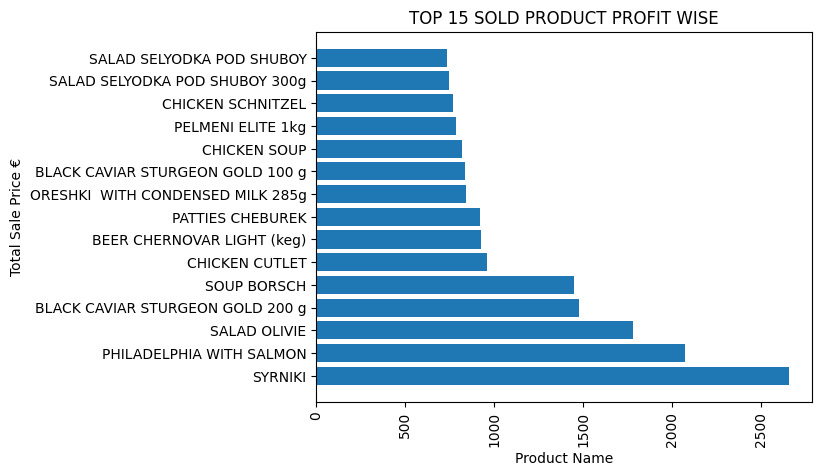

In [48]:
#Here i create the final bar chart of the the TOP 15 SOLD PRODUCT PROFIT WISE

y = top_sales_money['total_sale_price']
x = top_sales_money['product_name']

plt.barh(x, y)
plt.xlabel('Product Name')
plt.ylabel('Total Sale Price €')
plt.title('TOP 15 SOLD PRODUCT PROFIT WISE')
plt.xticks(rotation=90)
plt.show()



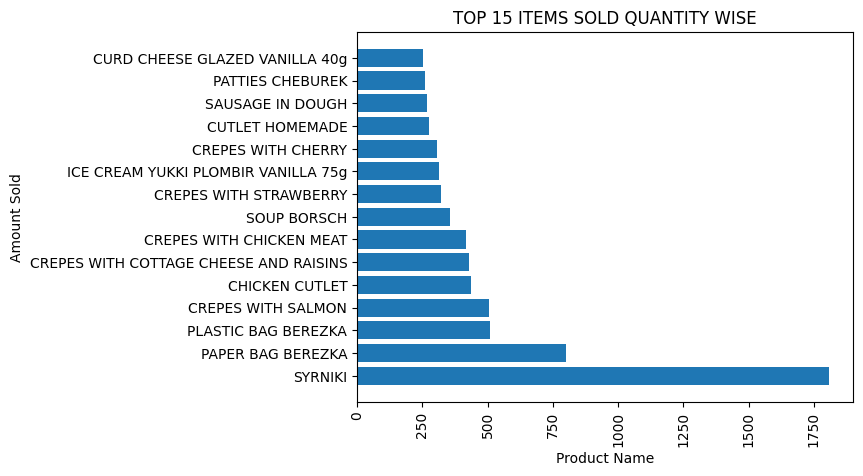

In [49]:
#Here i create the final bar chart of the the TOP 15 SOLD PRODUCT QUANTITY WISE


x = top_sales_quantity['product_name']
y = top_sales_quantity['amount']

plt.barh(x, y)
plt.xlabel('Product Name')
plt.ylabel('Amount Sold')
plt.title('TOP 15 ITEMS SOLD QUANTITY WISE')
plt.xticks(rotation=90)
plt.show()

<h1><b>Conclusion</b></h1>

<h3>Through this analysis, we can see that that the most sold product quantity-wise differ from the top 15 products sold profit-wise. We can also see what is the monthly demand from each top rated product, and forecast what demand will be for the next month (providing there is no change in seasonality)</h3>

